# 0.0 IMPORTS


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib 
import seaborn as sns
import inflection 
import math 
import matplotlib.pyplot as plt


## 0.1. Helper Functions


## 0.2. Loading data

In [3]:
# Import datasets
df_sales_raw = pd.read_csv('../datasets/train.csv', low_memory=False) 
df_store_raw = pd.read_csv('../datasets/store.csv', low_memory=False) 

# Merge 

df_raw = pd.merge (df_sales_raw, df_store_raw , how='left', on='Store')

# 1.0 DATA DESCRIPTIONS 

In [4]:

df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
701691,27,4,2013-10-10,10872,1205,1,1,0,0,a,a,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct"


## 1.1 Rename Columns 

In [5]:
# Criar uma copia a cada nova tarefa

df1 = df_raw.copy()

In [1]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment','CompetitionDistance',
            'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'] 

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#Rename of columns
df1.columns = cols_new

NameError: name 'inflection' is not defined

In [2]:
df1


NameError: name 'df1' is not defined

1.2 Data Dimensions


In [8]:
print(f"Number of Rows {df1.shape[0]}")
print(f"Number of Columns {df1.shape[1]}")

Number of Rows 1017209
Number of Columns 18


1.2 Data Types


In [9]:

df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

1.4 Check NA 

In [10]:
# Mensurar a quantidade de linhas vazias

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 0.5 NA Treatment 

In [11]:
    # 3 Metodos de Tratamento 
        # 1 - Deletar coluna
        # 2 - Usar algoritmos de ML            
            # Usado quando não há muito entendimento do negocio 
        # 3 - Entendendo o negocio 



1.5 Fillout NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [13]:

#competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month
df1['competition_open_since_month']= df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year 

df1['competition_open_since_year']= df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)
                               
#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)

#promo2_since_year       

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)   




In [14]:
#promo_interval  
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x : 0 if x['promo_interval'] == 0 else 1 if x['month_map']in x['promo_interval'].split(',') else 0, axis=1)


In [15]:
df1.sample(10).T

,362550,280604,883444,91899,68802,716823,635046,590072,177332,52790
store,1051,337,35,470,788,664,282,1023,48,386
day_of_week,2,5,2,7,7,5,1,7,7,7
date,2014-08-19 00:00:00,2014-11-14 00:00:00,2013-04-30 00:00:00,2015-05-10 00:00:00,2015-05-31 00:00:00,2013-09-27 00:00:00,2013-12-09 00:00:00,2014-01-19 00:00:00,2015-02-22 00:00:00,2015-06-14 00:00:00
sales,8307,6238,12230,0,0,5609,4423,0,0,0
customers,994,430,883,0,0,673,678,0,0,0
open,1,1,1,0,0,1,1,0,0,0
promo,1,1,1,0,0,1,0,0,0,0
state_holiday,0,0,0,0,0,0,0,0,0,0
school_holiday,1,0,0,0,0,0,0,0,0,0
store_type,c,d,d,a,a,d,a,c,a,d


## 0.6 Changes types

In [16]:

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)      

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)                
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [18]:
df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## Descriptive Statistical 

In [19]:
#Separate categorical variables from numeric variables

num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes=df1.select_dtypes(include = ['object'])


In [20]:
# Central Tendencian - mean(Media), median (mediana)

# Create a New Data Set with the central tendencians

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T 
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

In [21]:
#Dispersion - std, min, max, range, skew, kurtosis

# Create a New Data Set with the central tendencians

# std 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T

# min 
d2 = pd.DataFrame(num_attributes.apply(min)).T

# max
d3 = pd.DataFrame(num_attributes.apply(max)).T

# range 
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T

# skew 
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T

# kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew','kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.155231,0.0,0.362124,1.904152,1.625796


## 1.7.2 Categories Attributes


In [22]:
cat_attributes.apply(lambda x : x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

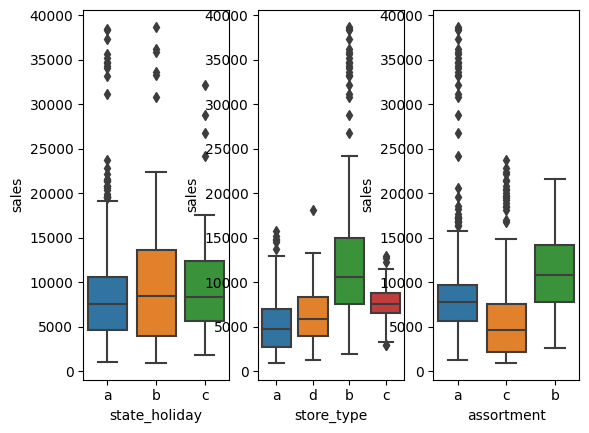

In [23]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday' , y='sales' , data=aux1 )

plt.subplot(1,3,2)
sns.boxplot(x='store_type' , y='sales' , data=aux1 )

plt.subplot(1,3,3)
sns.boxplot(x='assortment' , y='sales' , data=aux1 )

# 2.0 FEATURE ENGINNERING

In [24]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipoteses

## 2.1 Criação das Hipoteses

## 2.1 Lista Final de Hipoteses

## 2.4 Feature Engineering


In [25]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month']= df2['date'].dt.month
# day 
df2['day']=df2['date'].dt.day

# week of year
df2['week_of_year']= df2['date'].dt.isocalendar().week

# # year week
df2['year_of_week']= df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1),axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x:x.days).astype(int)

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since']= df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w')- datetime.timedelta( days=7 ))
df2['promo_since_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


#assortment
df2['assortment'] =df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x == 'c' else 'regular_day')

NameError: name 'datetime' is not defined

In [ ]:
df2.head().T

# 3.0 VARIABLES FILTERING 

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_of_week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,31,2015,0,Jul,0,2015,7,31,31,2015-30
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,31,2015,0,Jul,0,2015,7,31,31,2015-30
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,31,2015,0,Jul,0,2015,7,31,31,2015-30


In [ ]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

In [ ]:
cols_drop = ['customers','open','promo_interval','month_map']

In [ ]:
df3.columns

# 4.0 VARIABLES FILTERING 

In [1]:
df4 = df3.copy()

NameError: name 'df3' is not defined

## 4.1 Analise Univariada

### 4.1.1 Response Variable 

<AxesSubplot:xlabel='sales', ylabel='Count'>

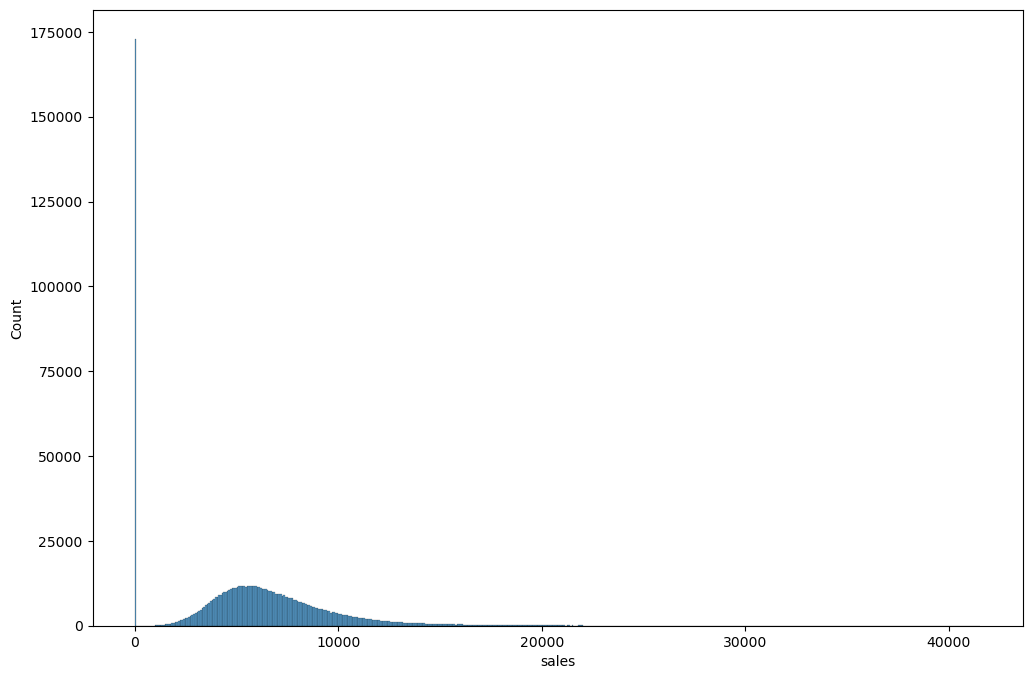

### 4.1.2 Numerical Variable

### 4.1.3 Categorical Variable 

## 4.2 Analise Bivariada 

## 4.3 Analise Multivariada